In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def Transform(transform_m, matrix):
    [tx], [ty], [tt] = transform_m
    
    R = np.array([[np.cos(tt), -np.sin(tt), 0],
                  [np.sin(tt),  np.cos(tt), 0],
                  [0         ,           0, 1]])
    
    transformed_m = []
    
    for X in matrix:
            tX = transform_m + R.dot(X)
            transformed_m.append(tX)
    
    return transformed_m

In [14]:
class Robot:
    def __init__(self, x, y, rad):
        # ステップごとのロボットの姿勢の真値が入った配列
        self.actual_poses = [np.array([[x],
                                       [y],
                                       [rad]])]
        
        sens_pos_A = np.array([[0.1],
                               [-0.1],
                               [0]])
        
        sens_pos_B = np.array([[0.1],
                               [0],
                               [np.pi / 180.0 * 45]])
        
        sens_pos_C = np.array([[0.1],
                               [0],
                               [np.pi / 180.0 * -45]])
        
        sens_pos_D = np.array([[0.1],
                               [0.1],
                               [0]])
        
        self.sens_pos_R = [sens_pos_A, sens_pos_B, sens_pos_C, sens_pos_D]
        
        self.sens_pos_W = Transform(self.actual_poses[-1], self.sens_pos_R)
        
    def move(self,fw,rot):
        # 移動前の位置を保存
        [px], [py], [pt] = self.actual_poses[-1]
        
        #入力ベクトル
        u = np.array([[fw],
                      [rot]])
        
        B = np.array([[np.cos(pt), 0],
                      [np.sin(pt), 0],
                      [0         , 1]])
        
        # 移動後の位置を計算
        X = self.actual_poses[-1] + B.dot(u)
        
        self.actual_poses.append(X)
        
        self.sens_pos_W = Transform(self.actual_poses[-1], self.sens_pos_R)
        
    def draw(self, sp):
        xs = [e[0] for e in self.actual_poses]
        ys = [e[1] for e in self.actual_poses]
        vxs = [0.1 * np.cos(e[2]) for e in self.actual_poses]
        vys = [0.1 * np.sin(e[2]) for e in self.actual_poses]
        plt.quiver(xs,ys,vxs,vys,color="red",label="actual robot motion",scale=1,angles='xy',scale_units='xy',alpha = 0.5)
        
        xs = [e[0] for e in self.sens_pos_W]
        ys = [e[1] for e in self.sens_pos_W]
        vxs = [0.1 * np.cos(e[2]) for e in self.sens_pos_W]
        vys = [0.1 * np.sin(e[2]) for e in self.sens_pos_W]
        plt.quiver(xs,ys,vxs,vys,color="skyblue",label="sensor pose",scale=1,angles='xy',scale_units='xy',alpha = 0.8)

In [19]:
def draw(i):
    # グラフの設定
    fig = plt.figure(i, figsize=(8,8))
    sp = fig.add_subplot(111,aspect='equal')
    sp.set_xlim(-0.25,2.25)
    sp.set_ylim(-0.25,1.25)
    
    robot.draw(sp)
    
    plt.legend()

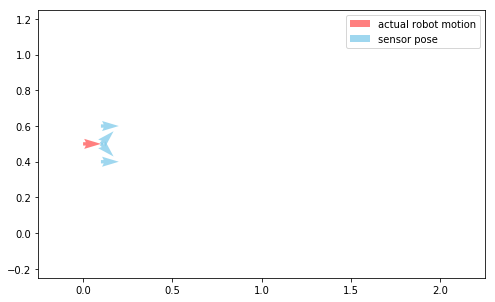

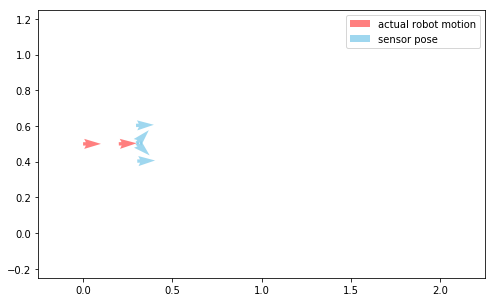

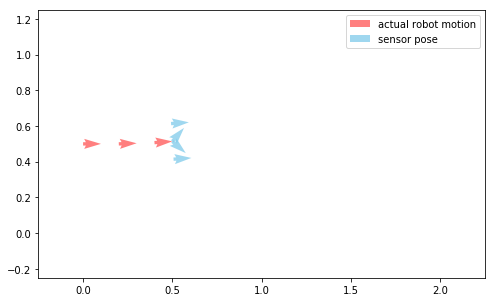

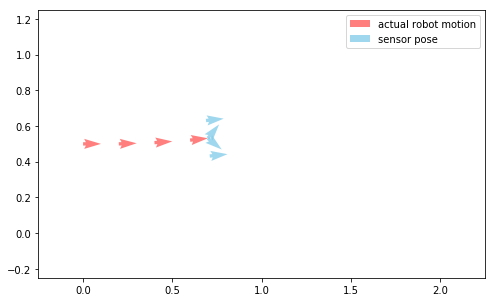

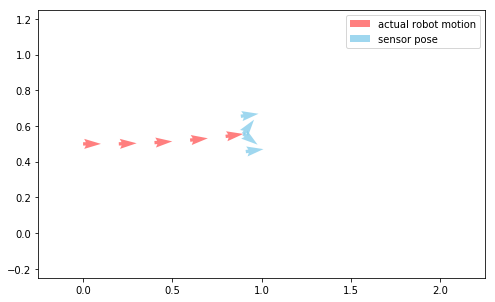

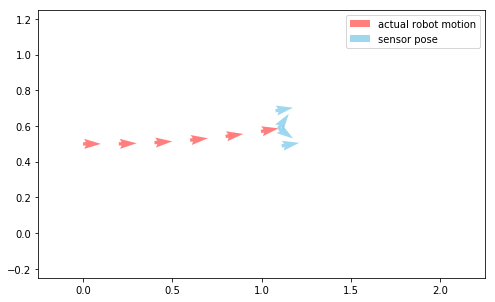

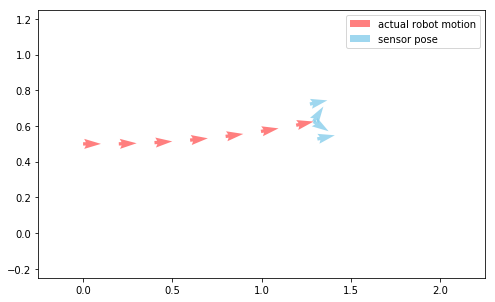

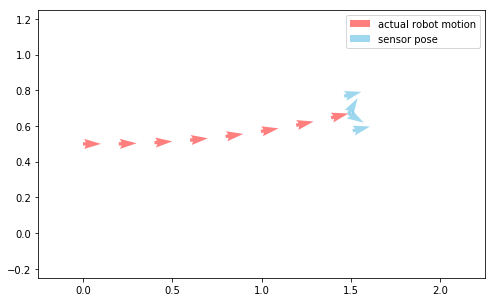

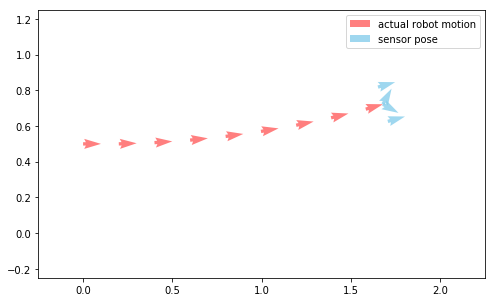

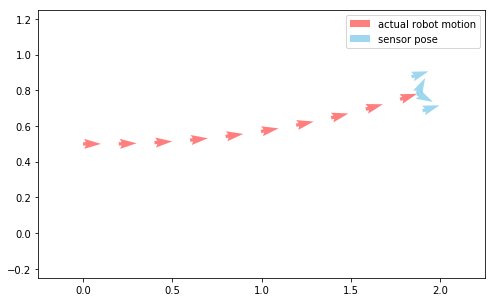

In [23]:
robot = Robot(0,0.5,0)   #ロボット設置
draw(0)

for i in range(1, 10):
    robot.move(0.2, np.pi / 180.0 * 2)     #ロボットの移動
    draw(i)